In [1]:
# Acquisition of elevation data

import numpy as np
csv_path = "C:/Users/LENOVO THINKPAD W550/Desktop/general_practice/mtfuji_data.csv"


np.set_printoptions(suppress=True) # Set prohibition of scientific notation
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)

In [2]:
print(fuji[130:140])

[[  130.          35.352505   138.756638  2563.4      41888.      ]
 [  131.          35.35418    138.753742  2703.1      42210.      ]
 [  132.          35.355855   138.750846  2825.55     42532.      ]
 [  133.          35.35753    138.74795   2967.9      42854.      ]
 [  134.          35.359205   138.745054  3087.81     43177.      ]
 [  135.          35.36088    138.742157  3266.24     43499.      ]
 [  136.          35.362555   138.739261  3434.59     43821.      ]
 [  137.          35.36423    138.736364  3600.08     44143.      ]
 [  138.          35.365904   138.733468  3679.96     44466.      ]
 [  139.          35.367579   138.730571  3664.9      44788.      ]]


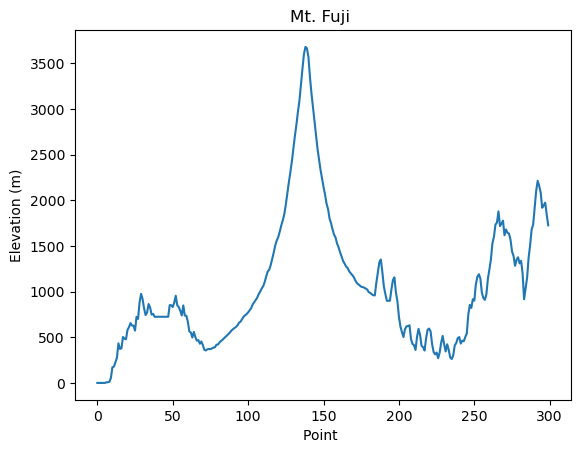

In [5]:
# Problem 1

import numpy as np
import matplotlib.pyplot as plt

# Load the data from the CSV file
csv_path = "C:/Users/LENOVO THINKPAD W550/Desktop/general_practice/mtfuji_data.csv"
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)

# Extract the elevation data from the CSV file
elevation = fuji[:, 3]

# Create an array of point indices from 0 to the number of points
indices = np.arange(len(elevation))

# Plot the elevation data as a line graph
plt.plot(indices, elevation)

# Set the title and axis labels
plt.title("Mt. Fuji ")
plt.xlabel("Point ")
plt.ylabel("Elevation (m)")

# Show the plot
plt.show()


In [6]:
# Problem 2 

'a function to calculate the gradient at a certain point'

import numpy as np

# Load the data from the CSV file
csv_path = "C:/Users/LENOVO THINKPAD W550/Desktop/general_practice/mtfuji_data.csv"
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)

def calculate_gradient(current_point):
    # Get the elevation and point number for the current point
    current_elevation = fuji[current_point][3]
    current_point_number = fuji[current_point][0]

    # Check if we are at the highest point
    if current_point_number == len(fuji) - 1:
        return 0.0

    # Get the elevation and point number for the next point
    next_elevation = fuji[current_point - 1][3]
    next_point_number = fuji[current_point - 1][0]

    # Calculate the gradient
    gradient = (next_elevation - current_elevation) / (next_point_number - current_point_number)

    return gradient

gradient_at_point_10 = calculate_gradient(10)

In [8]:
# Problem 3 

'a function to calculate the destination point'

def calculate_destination_point(current_point, learning_rate=0.2):
    # Calculate the gradient at the current point
    gradient = calculate_gradient(current_point)

    # Calculate the destination point
    destination_point = current_point - learning_rate * gradient

    # Round the destination point to the nearest integer
    destination_point = int(round(destination_point))

    # Check if the destination point is within the range of valid points
    if destination_point < 0 or destination_point >= len(fuji):
        return None

    return destination_point

destination_point_from_point_10 = calculate_destination_point(10)



In [10]:
# Problem 4

def go_down_the_mountain(start_point):
    current_point = start_point
    path = [current_point] # List to store the points for each move
    
    while True:
        destination_point = calculate_destination_point(current_point)
        
        # Check if the destination point is the same as the current point
        if destination_point == current_point:
            print("Reached the bottom of the mountain!")
            break
            
        # Update the current point to the destination point
        current_point = destination_point
        
        # Add the new current point to the path list
        path.append(current_point)
        
    return path
path_from_point_136 = go_down_the_mountain(136)



Reached the bottom of the mountain!


Reached the bottom of the mountain!


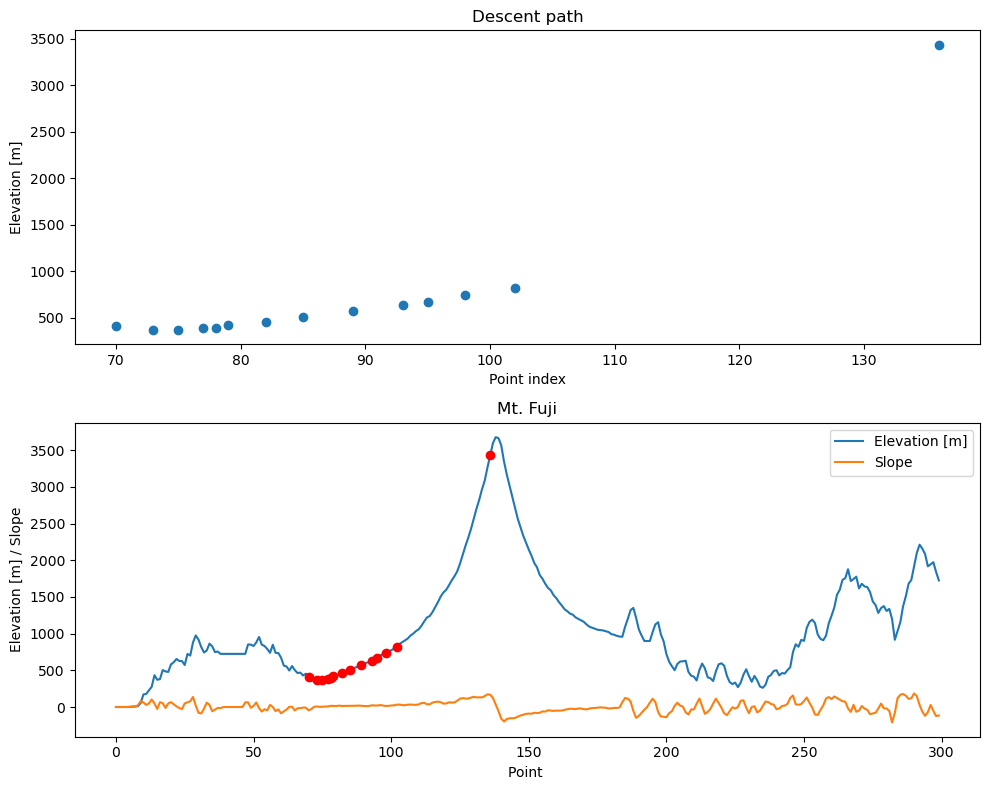

In [14]:
# Problem 5
import matplotlib.pyplot as plt

def visualize_descent(path):
    # Extract the elevation and slope data for the entire mountain
    csv_path = "C:/Users/LENOVO THINKPAD W550/Desktop/general_practice/mtfuji_data.csv"
    fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)
    elevations = fuji[:, 3]
    slopes = np.gradient(elevations)
    
    # Extract the elevation and slope data for the path
    path_elevations = elevations[path]
    path_slopes = slopes[path]
    
    # Set up the plot
    fig, ax = plt.subplots(2, 1, figsize=(10, 8))
    
    # Plot the path points as dots on the first subplot
    ax[0].plot(path, path_elevations, "o")
    ax[0].set_xlabel("Point index")
    ax[0].set_ylabel("Elevation [m]")
    ax[0].set_title("Descent path")
    
    # Plot the elevation and slope data for the entire mountain on the second subplot
    ax[1].plot(elevations, label="Elevation [m]")
    ax[1].plot(slopes, label="Slope")
    ax[1].legend()
    ax[1].set_xlabel("Point ")
    ax[1].set_ylabel("Elevation [m] / Slope")
    ax[1].set_title("Mt. Fuji")
    
    # Highlight the path points on the second subplot
    ax[1].plot(path, path_elevations, "o", color="red")
    
    plt.tight_layout()
    plt.show()
    
path_from_point_136 = go_down_the_mountain(136)
visualize_descent(path_from_point_136)
